# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('creditcard.csv', index_col=0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data.drop(['Class'], axis=1))
y = data['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

### Логистическая регрессия

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9991924440855307
precision: 0.8285714285714286
recall: 0.6304347826086957
f1: 0.7160493827160495
roc_auc: 0.8151118875237958


#### ROC - кривая

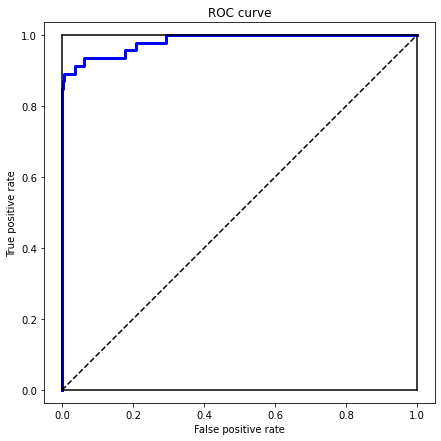

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### KNN

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9995435553526912
precision: 0.9459459459459459
recall: 0.7608695652173914
f1: 0.8433734939759038
roc_auc: 0.8803996146818449


#### ROC - кривая

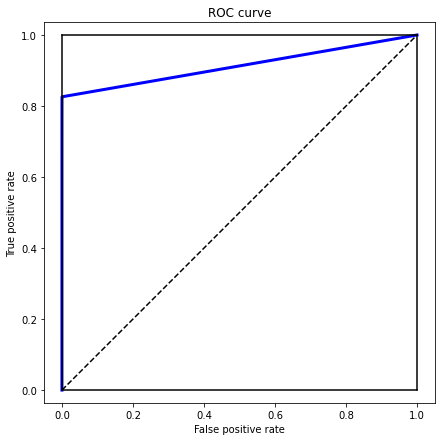

In [ ]:

y_pred_proba = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### Константа

In [ ]:
preds = np.array([0]*len(y_test))

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9983848881710614
precision: 0.0
recall: 0.0
f1: 0.0
roc_auc: 0.5


C:\Users\proho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ROC - кривая

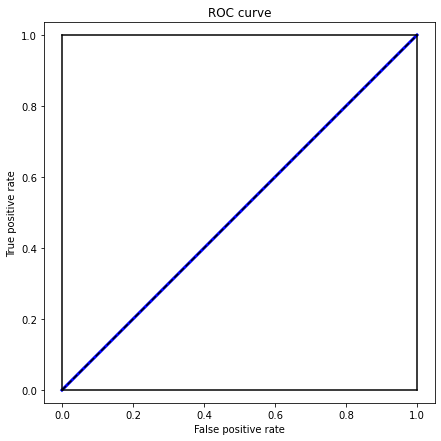

In [ ]:
y_pred_proba = preds
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9996137776061234
precision: 0.972972972972973
recall: 0.782608695652174
f1: 0.8674698795180723
roc_auc: 0.8912867638626615


#### ROC - кривая

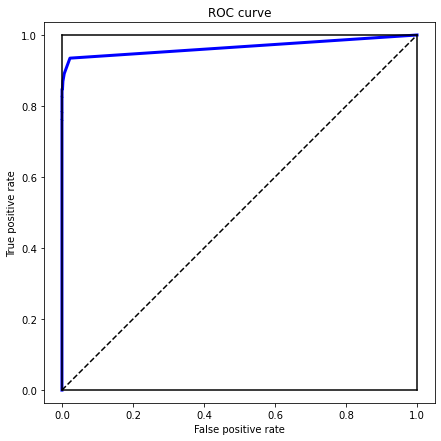

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Я выберу f1_score, т.к в данной задаче, как мне кажется, важна как точность, так и полнота. Ведь мы не хотим забанить человека, который просто перевел денежку другу, но и пропускать мошенников нам тоже нельзя. Поэтому важно сохранить баланас, а f1 как раз помогает этого добиться. Accuracy не подходит так как у нас сильный дисбаланс классов, даже константа выдает 0.99

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

### LogisticRegression 
переберем параметры и найдем лучшую комбинацию

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 
              'class_weight':({0: 1, 1: 2},{0: 1, 1: 5}, {0: 1, 1: 10} ,{0: 1, 1: 50}, {0: 1, 1: 100})}
model = LogisticRegression()
gs = GridSearchCV(model, parameters, scoring = 'f1')
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'f1: {f1_score(y_test, preds)}')

f1: 0.8089887640449438


Лучшие параметры:

In [ ]:
gs.best_params_

{'class_weight': {0: 1, 1: 5}, 'penalty': 'l2'}

### KNN
переберем параметры и найдем лучшую комбинацию

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':(2, 5, 10), 'weights' : ('uniform', 'distance')}
model = KNeighborsClassifier()
gs = GridSearchCV(model, parameters, scoring = 'f1', verbose = 100, n_jobs = -1)
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'f1: {f1_score(y_test, preds)}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 24.5

In [ ]:
gs.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(500, 1000), 
              'criterion' : ('gini', 'entropy'), 'max_depth' : ('None', 500, 1000)}
model = RandomForestClassifier()
gs = GridSearchCV(model, parameters, scoring = 'f1', verbose = 10, n_jobs = -1)
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'f1: {f1_score(y_test, preds)}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 59.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 92.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 92.5min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 151.6min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 170.3min remaining: 26.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 206.2min finished


f1: 0.853658536585366


In [ ]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 500, 'n_estimators': 1000}

### Работа с фичами

1. Я хочу добавить новый признак - количество центов в сумме транзакций, так как зачастую обычные клиенты банка переводят целые суммы без центов

In [ ]:
data['cents'] = data['Amount']%1
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cents
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.62
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.69
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.66
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.50
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.77
172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.79
172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.88


In [ ]:
X = StandardScaler().fit_transform(data.drop(['Class'], axis=1))
X.shape

(284807, 30)

Проверяю модели на кросс валидации, чтобы понять как они себя показывают не на конкретной тестовой выборке, а в общем случае.

In [ ]:
# logReg
model = LogisticRegression(class_weight = {0: 1, 1: 5}, penalty = 'l2')
print(f'LogReg {np.average(cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs = -1))}')

#KNN
model = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform')
print(f'KNN {np.average(cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs = -1))}')

#RandomForest
model = RandomForestClassifier(criterion = 'entropy', max_depth = 500, n_estimators = 1000)
print(f'RandomForest {np.average(cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs = -1))}')


LogReg 0.7838334682028062
KNN 0.7431702052845034
RandomForest 0.811457903781403


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)
model = LogisticRegression(class_weight = {0: 1, 1: 5}, penalty = 'l2', n_jobs = -1)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(f'Logreg f1: {f1_score(y_test, preds)}')

#KNN
model = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', n_jobs = -1)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(f'KNN f1: {f1_score(y_test, preds)}')


#RandomForest
model = RandomForestClassifier(criterion = 'entropy', max_depth = 500, n_estimators = 1000, n_jobs = -1)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(f'RandomForest f1: {f1_score(y_test, preds)}')


Logreg f1: 0.8089887640449438
KNN f1: 0.8571428571428571
RandomForest f1: 0.8641975308641976


#### Метод ANOVA

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from tqdm import tqdm


lr_f1_results = []
knn_f1_results = []
rf_f1_results = []
X_ = data.drop(['Class'], axis=1)
for i in tqdm(np.arange(20,31)):
    x_data_kbest = SelectKBest(f_classif, k=i).fit_transform(X, y)
    X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(
    x_data_kbest, y, test_size=0.1, random_state=42)
    
    lr = LogisticRegression(class_weight = {0: 1, 1: 5}, penalty = 'l2', n_jobs = -1)
    lr.fit(X_train_gen, y_train_gen)
    preds = lr.predict(X_test_gen)
    lr_f1_results.append(f1_score(y_test_gen, preds))
    
    knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', n_jobs = -1)
    knn.fit(X_train_gen, y_train_gen)
    preds = knn.predict(X_test_gen)
    knn_f1_results.append(f1_score(y_test_gen, preds))
    
    rf = RandomForestClassifier(criterion = 'entropy', max_depth = 500, n_estimators = 1000, n_jobs = -1)
    rf.fit(X_train_gen, y_train_gen)
    preds = rf.predict(X_test_gen)
    rf_f1_results.append(f1_score(y_test_gen, preds))

100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [1:19:27<00:00, 433.41s/it]


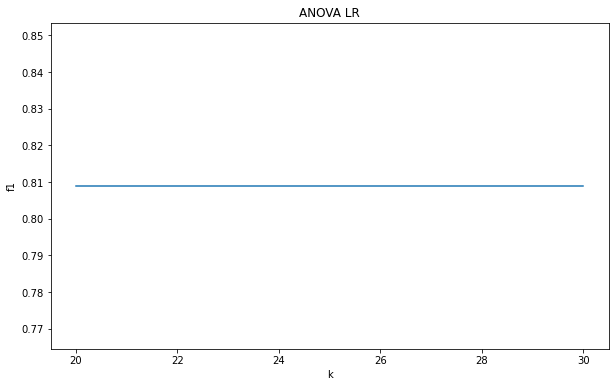

the best k = 20
the best f1 = 0.8089887640449438


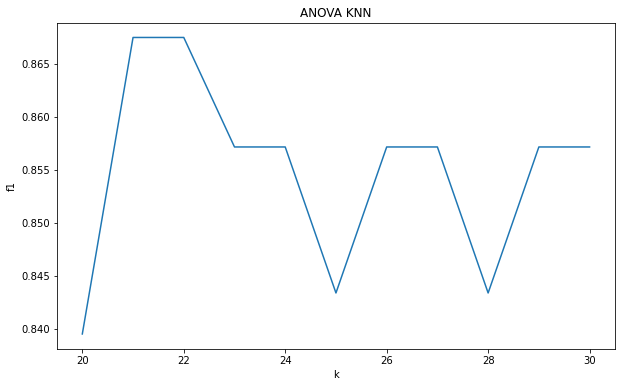

the best k = 21
the best f1 = 0.8674698795180723


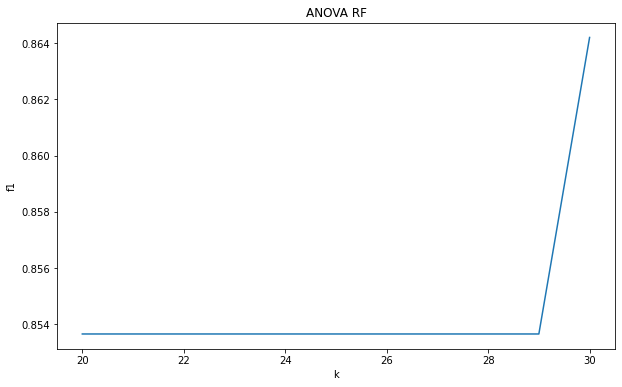

the best k = 30
the best f1 = 0.8641975308641976


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(20,31), lr_f1_results)
plt.title('ANOVA LR')
plt.ylabel('f1')
plt.xlabel('k')
plt.show()
print(f'the best k = {np.argmax(lr_f1_results) + 20}')
print(f'the best f1 = {sorted(lr_f1_results)[-1]}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(20,31), knn_f1_results)
plt.title('ANOVA KNN')
plt.ylabel('f1')
plt.xlabel('k')
plt.show()
print(f'the best k = {np.argmax(knn_f1_results) + 20}')
print(f'the best f1 = {sorted(knn_f1_results)[-1]}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(20,31), rf_f1_results)
plt.title('ANOVA RF')
plt.ylabel('f1')
plt.xlabel('k')
plt.show()
print(f'the best k = {np.argmax(rf_f1_results) + 20}')
print(f'the best f1 = {sorted(rf_f1_results)[-1]}')

### Итог

Максимальный скор удалось выбить на KNN равный 0.867 (при k = 21 в ANOVA), RandomForest получил очень близкий результат равный 0.864 (при k = 30 в ANOVA), Логистическая регрессия оказалась слабее всех со скором 0.8089 (метод ANOVA не принес никакий результатов).

Прирост моделей:
###### LR: 0.716 -> 0.8089
###### KNN: 0.843 -> 0.867
###### RF: 0.867 -> 0.864 (Тут результат даже упал по сравнению с первым запуском, видимо все эти преодбразования хороши для Лог регрессии и более менее подошли для КНН, но RandomForest не очень оценил такие изменения)

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

https://www.kaggle.com/caparrini/beatsdataset
Этот датасет на классификацию 23 жанров музыки.

Каждая строка-это песня. Набор данных содержит по 100 песен для каждого из 23 жанров электронной музыки (итого 2300 песен), данные композиции были (100) лучшими песнями среди своего жанра в ноябре 2016 года. 71 признак-это разнообразные "звуковые функции", извлеченные из двух случайных минутных выборок аудио файла. Функции были получены с помощью pyAudioAnalysis (https://github.com/tyiannak/pyAudioAnalysis).

In [ ]:
my_data = pd.read_csv('beatsdataset.csv', index_col=0)
my_data.head()

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,1.594074,...,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,BigRoom
1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,1.261364,...,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,BigRoom
2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,1.425185,...,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,BigRoom
3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,1.463686,...,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,BigRoom
4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,1.187854,...,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,BigRoom


Посмотрим какие классы у нас есть и как они сбалансированы

In [ ]:
my_data['class'].value_counts()

DeepHouse               100
FutureHouse             100
HardcoreHardTechno      100
Dance                   100
HipHop                  100
GlitchHop               100
ReggaeDub               100
HardDance               100
Breaks                  100
ElectroHouse            100
DrumAndBass             100
Trance                  100
TechHouse               100
Minimal                 100
ElectronicaDowntempo    100
House                   100
PsyTrance               100
BigRoom                 100
Dubstep                 100
IndieDanceNuDisco       100
Techno                  100
FunkRAndB               100
ProgressiveHouse        100
Name: class, dtype: int64

Все классы представлены в равных пропорциях, это радует

In [ ]:

X = my_data.drop(['class'], axis=1) 
y = my_data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

###  LogisticRegression при дефолтных параметрах

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model = LogisticRegression(multi_class = 'auto', n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print('___________________________________________________________________________________________________________________________')
print(f'precision "macro": {precision_score(y_test, preds, average = "macro")}| precision "micro": {precision_score(y_test, preds, average = "micro")}', end ='| ')
print(f'precision "weighted": {precision_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'recall "macro": {recall_score(y_test, preds, average = "macro")}| recall "micro": {recall_score(y_test, preds, average = "micro")}', end ='| ')
print(f'recall "weighted": {recall_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'f1 "macro": {f1_score(y_test, preds, average = "macro")}| f1 "micro": {f1_score(y_test, preds, average = "micro")}', end ='| ')
print(f'f1 "weighted": {f1_score(y_test, preds, average = "weighted")}')

accuracy: 0.1956521739130435
___________________________________________________________________________________________________________________________
precision "macro": 0.2250555051907666| precision "micro": 0.1956521739130435| precision "weighted": 0.2386252241948867
___________________________________________________________________________________________________________________________
recall "macro": 0.2080243428069515| recall "micro": 0.1956521739130435| recall "weighted": 0.1956521739130435
___________________________________________________________________________________________________________________________
f1 "macro": 0.14538424475077033| f1 "micro": 0.1956521739130435| f1 "weighted": 0.15065617611707394


### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, preds)}')
print('___________________________________________________________________________________________________________________________')
print(f'precision "macro": {precision_score(y_test, preds, average = "macro")}| precision "micro": {precision_score(y_test, preds, average = "micro")}', end ='| ')
print(f'precision "weighted": {precision_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'recall "macro": {recall_score(y_test, preds, average = "macro")}| recall "micro": {recall_score(y_test, preds, average = "micro")}', end ='| ')
print(f'recall "weighted": {recall_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'f1 "macro": {f1_score(y_test, preds, average = "macro")}| f1 "micro": {f1_score(y_test, preds, average = "micro")}', end ='| ')
print(f'f1 "weighted": {f1_score(y_test, preds, average = "weighted")}')

accuracy: 0.5260869565217391
___________________________________________________________________________________________________________________________
precision "macro": 0.48915228816292217| precision "micro": 0.5260869565217391| precision "weighted": 0.5392307290008865
___________________________________________________________________________________________________________________________
recall "macro": 0.5129995608256478| recall "micro": 0.5260869565217391| recall "weighted": 0.5260869565217391
___________________________________________________________________________________________________________________________
f1 "macro": 0.4812263818748394| f1 "micro": 0.5260869565217391| f1 "weighted": 0.5165584135302103


### KNN

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, preds)}')
print('___________________________________________________________________________________________________________________________')
print(f'precision "macro": {precision_score(y_test, preds, average = "macro")}| precision "micro": {precision_score(y_test, preds, average = "micro")}', end ='| ')
print(f'precision "weighted": {precision_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'recall "macro": {recall_score(y_test, preds, average = "macro")}| recall "micro": {recall_score(y_test, preds, average = "micro")}', end ='| ')
print(f'recall "weighted": {recall_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'f1 "macro": {f1_score(y_test, preds, average = "macro")}| f1 "micro": {f1_score(y_test, preds, average = "micro")}', end ='| ')
print(f'f1 "weighted": {f1_score(y_test, preds, average = "weighted")}')

accuracy: 0.4782608695652174
___________________________________________________________________________________________________________________________
precision "macro": 0.45190027363940394| precision "micro": 0.4782608695652174| precision "weighted": 0.49303039955213873
___________________________________________________________________________________________________________________________
recall "macro": 0.4691542756760148| recall "micro": 0.4782608695652174| recall "weighted": 0.4782608695652174
___________________________________________________________________________________________________________________________
f1 "macro": 0.43925473515050606| f1 "micro": 0.4782608695652174| f1 "weighted": 0.4647919843136269


Константное предсказание(везде предскажем хипхоп)

In [ ]:
preds = np.array(['HipHop']*len(X_test))
print(f'accuracy: {accuracy_score(y_test, preds)}')
print('___________________________________________________________________________________________________________________________')
print(f'precision "macro": {precision_score(y_test, preds, average = "macro")}| precision "micro": {precision_score(y_test, preds, average = "micro")}', end ='| ')
print(f'precision "weighted": {precision_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'recall "macro": {recall_score(y_test, preds, average = "macro")}| recall "micro": {recall_score(y_test, preds, average = "micro")}', end ='| ')
print(f'recall "weighted": {recall_score(y_test, preds, average = "weighted")}')
print('___________________________________________________________________________________________________________________________')
print(f'f1 "macro": {f1_score(y_test, preds, average = "macro")}| f1 "micro": {f1_score(y_test, preds, average = "micro")}', end ='| ')
print(f'f1 "weighted": {f1_score(y_test, preds, average = "weighted")}')

accuracy: 0.04782608695652174
___________________________________________________________________________________________________________________________
precision "macro": 0.002079395085066163| precision "micro": 0.04782608695652174| precision "weighted": 0.0022873345935727793
___________________________________________________________________________________________________________________________
recall "macro": 0.043478260869565216| recall "micro": 0.04782608695652174| recall "weighted": 0.04782608695652174
___________________________________________________________________________________________________________________________
f1 "macro": 0.003968969871910518| f1 "micro": 0.04782608695652174| f1 "weighted": 0.00436586685910157


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Для данного датасета я выберу метрику accuracy, т.к в данной задаче, как мне кажется, у нас нет необходимости отдавать приоритет какому-то классу по важности или бояться что мы изредка перепутаем жанр, т.к. ничего страшного не произойдет. Если мы представим что это алгоритм для какой-то рекомендательной системы в стриминговом сервисе, то нас будет интересовать, чтобы как можно больше подобранных треков подходили под любимый жанр пользователя, а accuracy как раз покажет насколько точно у нас получается их классифицировать.

Для начала обработаем данные

#### используем StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(my_data.drop(['class'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

model = LogisticRegression(multi_class = 'auto', n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'test accuracy: {accuracy_score(y_test, preds)}')
print(f'cv_accuracy {np.average(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs = -1))}')

test accuracy: 0.508695652173913
cv_accuracy 0.45507246376811594


In [ ]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, preds)}')
print(f'cv_accuracy {np.average(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs = -1))}')

test accuracy: 0.5217391304347826
cv_accuracy 0.5067632850241546


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, preds)}')
print(f'cv_accuracy {np.average(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs = -1))}')

test accuracy: 0.3391304347826087
cv_accuracy 0.29275362318840575


KNN уже не очень хорошо себя показал, поэтому дальше работаем с логрегрессией и рандомфорестом 

#### используем MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(my_data.drop(['class'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [ ]:
model = LogisticRegression(multi_class = 'auto', n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'test accuracy: {accuracy_score(y_test, preds)}')
print(f'cv_accuracy {np.average(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs = -1))}')

test accuracy: 0.5173913043478261
cv_accuracy 0.44106280193236713


In [ ]:
np.random.seed(42)
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, preds)}')
print(f'cv_accuracy {np.average(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs = -1))}')

test accuracy: 0.5652173913043478
cv_accuracy 0.5115942028985507


С MinMaxScaler результат лучше

#### Переберем параметры

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 
              'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
model = LogisticRegression()
gs = GridSearchCV(model, parameters, scoring = 'accuracy', verbose = 10, n_jobs = -1)
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0662s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0520s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (5.9142s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:   15.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:   45.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


accuracy: 0.5


In [ ]:
gs.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

Данные параметры дают лучший скор на кросвале обучающей выборки, но именно на нашем тестовом датасете результат оказывается меньше, чем при дефолтных параметрах. Хотя в общем случае такие параметры скорее всего покажут себя лучше

Для чистоты эксперимента я буду продолжать на параметрах, которые выдал GridSearchCV, хотя они и выдают меньший скор, т.к. сейчас у меня стоит seed=42 на разбиение выборок и поэтому разбиение нельзя назвать случайным, возможно данные в тестовой выборке распределились специфично, поэтому дефолтные параметры модели на ней показывают себя лучше

#### Повторим все то же самое для случайного леса

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(1, 5, 10, 50, 100, 500, 1000), 
              'criterion' : ('gini', 'entropy'), 'max_depth' : ('None', 5, 50, 100, 1000),
             'min_samples_split' : (1, 2, 5, 10, 50, 100), 'min_samples_leaf' : (1, 2, 5, 10),
             'max_features' : ('auto', 'sqrt', 'log2')}
model = RandomForestClassifier()
gs = GridSearchCV(model, parameters, scoring = 'accuracy', verbose = 10, n_jobs = -1)
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

SyntaxError: 'break' outside loop (<ipython-input-44-80a4452b9c8e>, line 1)

Я уже один раз подобрал параметры, но перезапускал все ячейки, поэтому пришлось в этот раз 'убить' GridSearchCV, чтобы не ждать еще несколько часов.

In [ ]:
gs.best_params_

Запуск при подобранных параметрах

In [ ]:
np.random.seed(42)
model = RandomForestClassifier(n_jobs = -1, criterion = 'gini', max_depth = 50, max_features = 'auto', min_samples_leaf = 2,
                              min_samples_split = 2, n_estimators = 1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'test accuracy: {accuracy_score(y_test, preds)}')
print(f'cv_accuracy {np.average(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs = -1))}')

test accuracy: 0.5347826086956522
cv_accuracy 0.5318840579710146


Так как случайнй лес показывает результат заметно лучше, чем лог регрессия, то далее буду пытаться улучшать его точность.

Опять-таки лучшая модель по результатам GridSearchCV на тестовой выборке показала результат хуже, чем модель из коробки. Но я думаю, что это связано с неудачным разбиением train_test_split и поэтому лучшая модель не показывает на тестовой выборке лучший результат.

Далее я буду использовать кроссвалидацию, чтобы не сталкиваться с этой проблемой

### Теперь попробуем работать с фичами

Отбор признаков методом ANOVA

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

accuracy_results = []
for i in tqdm(np.arange(1,72)):
    
    x_train_kbest = SelectKBest(f_classif, k=i).fit_transform(X_train, y_train)
    

    np.random.seed(42)
    model = RandomForestClassifier(n_jobs = -1, criterion = 'gini', max_depth = 50, max_features = 'auto', min_samples_leaf = 2,
                              min_samples_split = 2, n_estimators = 1000)
    
    
    accuracy_results.append(np.average(cross_val_score(model, x_train_kbest, y_train, cv=5, scoring='accuracy', n_jobs = -1)))

100%|██████████████████████████████████████████████████████████████████████████████████| 71/71 [10:27<00:00,  8.84s/it]


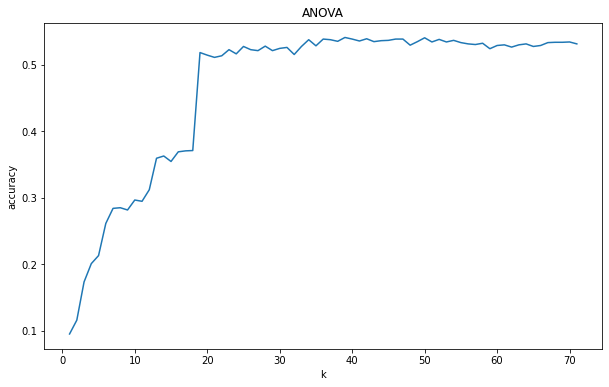

the best k = 39
the best cv_accuracy_score = 0.5410628019323671


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1,72), accuracy_results)
plt.title('ANOVA')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()
print(f'the best k = {np.argmax(accuracy_results) + 1}')
print(f'the best cv_accuracy_score = {sorted(accuracy_results)[-1]}')

Создадим новый датасет с лучшими параметрами для метода ANOVA

In [ ]:
x_data_kbest = SelectKBest(f_classif, k=39).fit_transform(X, y)
    
X_train, X_test, y_train, y_test = train_test_split(
    x_data_kbest, y, test_size=0.1, random_state=42)
    
np.random.seed(42)
model = RandomForestClassifier(n_jobs = -1, criterion = 'gini', max_depth = 50, max_features = 'auto', min_samples_leaf = 2,
                              min_samples_split = 2, n_estimators = 1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, preds)}')    

accuracy: 0.5565217391304348


Опять интересная картина. Результат на кросвале вырос, но на тестовой выборке все еще ниже чем при запуске модели из коробки. Думаю что это связано с неудачным разбиением при заданном сиде. 

Возможно я переобучаюсь, но мне кажется что кросс валидация дает более значимый результат (благодаря многократному разбиению), чем тестовая выборка.

1) Полиномиальные фичи

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


accuracy_results = []
for i in tqdm(np.arange(1,4)):
    
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X_train)

    np.random.seed(42)
    model = RandomForestClassifier(n_jobs = -1, criterion = 'gini', max_depth = 50, max_features = 'auto', min_samples_leaf = 2,
                              min_samples_split = 2, n_estimators = 1000)

    accuracy_results.append(np.average(cross_val_score(model, X_poly, y_train, cv=5, scoring='accuracy', n_jobs = -1)))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:59<00:00, 59.69s/it]


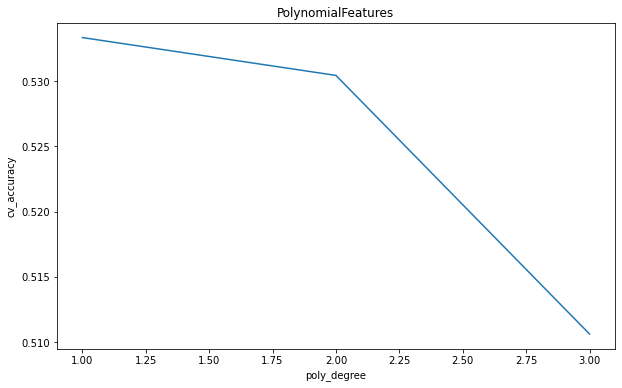

the best degree = 1
the best cv_accuracy = 0.5333333333333334


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1,4), accuracy_results)
plt.title('PolynomialFeatures')
plt.ylabel('cv_accuracy')
plt.xlabel('poly_degree')
plt.show()
print(f'the best degree = {np.argmax(accuracy_results) + 1}')
print(f'the best cv_accuracy = {sorted(accuracy_results)[-1]}')

Полиномиальные фичи не помогли

### Подведу итог

Лучшей моделью по итогу оказался RandomForest. На кросс валидации(по обучающей выборке) результат вырос c 0.512 до 0.543, на тестовой выборке первый запуск показал 0.53,
по итогу получилось выбить 0.556, хотя это и не лучший результат, так как до подбора пармаетров и работы с фичами я выбивал 0.565. Но все-таки я склояняюсь к тому, что 0.556 - это более честный результат, ведь на кросс валидации модель после преобразований показала себя лучше, а значит в общем случае она находит зависимости в данных лучше
